# 0. Import des modules

In [3]:
# pour faire des graphes
%matplotlib inline
import matplotlib.pyplot as plt

# pour faire des calculs (nombres aléatoires)
import numpy as np

# pour faire des graphes de stats
import seaborn as sns
sns.set()

/home/girardea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/girardea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/girardea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# 1. Générer des nombres aléatoires

## 1.1. Pile ou face

In [4]:
np.random.choice(['Pile', 'Face'], p=[0.1, 0.9])

'Face'

Sur 100 tirages, combien de "pile" ?

In [5]:
cnt = 0
for i in range(100):
    if np.random.choice(['Pile', 'Face']) == 'Pile':
        cnt += 1
        
print(f"J'ai obtenu {cnt} 'pile'.")

J'ai obtenu 49 'pile'.


En une ligne :

In [6]:
np.sum([np.random.choice(['Pile', 'Face']) == 'Pile' for i in range(100)])

52

In [7]:
np.sum(np.random.choice(['Pile', 'Face'], size=100) == 'Pile')

51

On en fait une fonction.

In [8]:
def nb_piles(nb_tirages=100, p=None):
    return np.sum(np.random.choice(['Pile', 'Face'], size=nb_tirages, p=p) == 'Pile')

for i in range(5):
    print(nb_piles())

52
51
49
51
46


/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


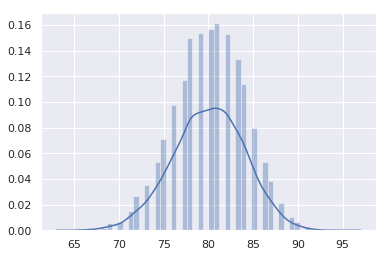

In [9]:
stats = [nb_piles(p=[0.8, 0.2]) for i in range(10000)]

sns.distplot(stats)

In [10]:
np.random.choice(['Pierre', 'Feuille', 'Ciseaux'])

'Pierre'

## 1.2. Loi uniforme

In [11]:
np.random.uniform()

0.21355310318049625

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


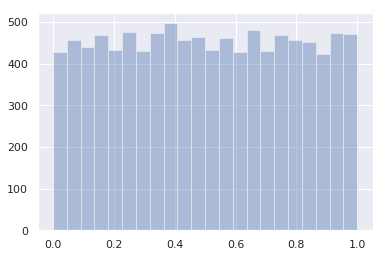

In [12]:
stats = np.random.uniform(size=10000)

sns.distplot(stats, kde=False)

## 1.3. Loi exponentielle

Cela représente le temps entre deux requêtes à un serveur.

In [13]:
inter = np.random.exponential(size=5)
inter

array([0.11319245, 1.45079576, 0.44933692, 0.13919201, 1.36500825])

In [14]:
inter.cumsum()

array([0.11319245, 1.56398822, 2.01332514, 2.15251715, 3.51752539])

In [15]:
fin = inter.cumsum() + 1.0
fin

array([1.11319245, 2.56398822, 3.01332514, 3.15251715, 4.51752539])

In [16]:
for idx, val in enumerate(inter):
    print(idx, val)

0 0.113192454984102
1 1.450795763300324
2 0.4493369199208958
3 0.1391920079542221
4 1.3650082486114334


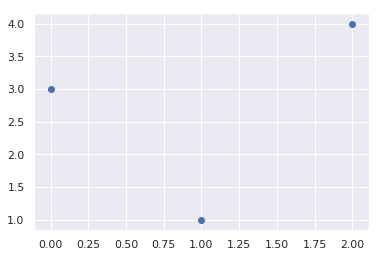

In [17]:
plt.scatter(x=[0, 1, 2], y=[3, 1, 4])

In [18]:
def plus_one(x):
    return x + 1

plus_one(5)

6

In [19]:
def factoriel(n):
    if n == 1:
        return n
    return n * factoriel(n-1)

factoriel(5)

120

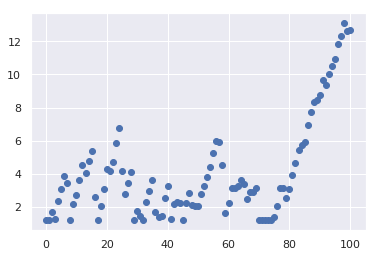

In [20]:
def temps_attente(n):
    """Calcule le temps d'attente pour la requête n"""
    if n == 0:
        stats.append(tempsCalcul)
        return tempsCalcul
    
    temps = np.random.exponential()
    
    if temps > tempsCalcul:
        res = tempsCalcul + max(temps_attente(n - 1) - temps, 0)
    else:
        res = temps_attente(n - 1) + tempsCalcul - temps
    
    stats.append(res)
    return res

tempsCalcul = 1.2
stats = []

temps_attente(100)

plt.scatter(x=range(len(stats)), y=stats)

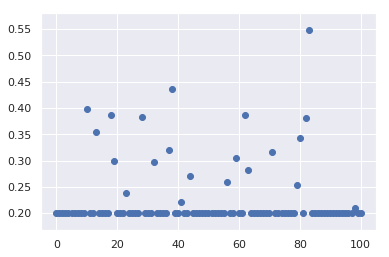

In [21]:
tempsCalcul = 0.2
stats = []

temps_attente(100)

plt.scatter(x=range(len(stats)), y=stats)

# 2. Régression (pour de la prévision)

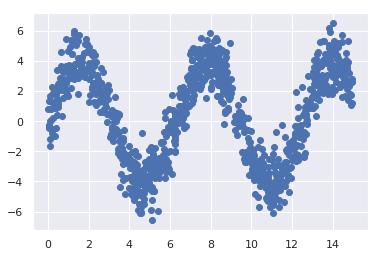

In [22]:
nb = 1000

x = np.random.uniform(low=0.0, high=15.0, size=nb)
y = 4.0 * np.sin(x) + np.random.normal(size=nb)

plt.scatter(x, y)

/home/girardea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


R2-score : -0.019759989944185152


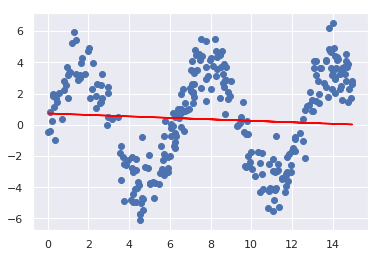

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Définir X et y
X = x.reshape(-1, 1) # pour transformer une colonne en tableau
y = y

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# instanciation du régresseur
reg = LinearRegression()

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

R2-score : 0.8769528324144679


/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


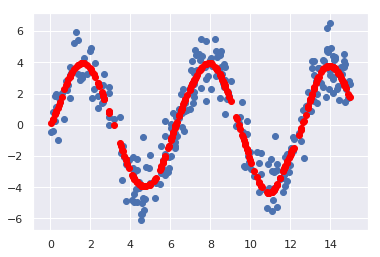

In [24]:
from sklearn.svm import SVR

# instanciation du régresseur
reg = SVR()

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')

R2-score : 0.8752718347844067


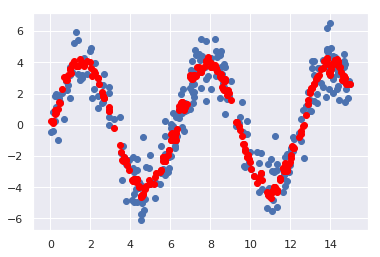

In [25]:
from sklearn.neighbors import KNeighborsRegressor

# instanciation du régresseur
reg = KNeighborsRegressor(n_neighbors=10)

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')

In [26]:
def score_func(X, y, reg, nb_splits=10):
    """Rend la liste des scores du régresseur reg sur le problème X, y"""
    scores = []
    
    # boucle sur les splits possibles
    for i in range(nb_splits):
        # split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # apprentissage
        reg.fit(X_train, y_train)

        # prédiction
        y_pred = reg.predict(X_test)

        # calcul du score
        scores.append(r2_score(y_test, y_pred))
        
    return scores

scores = score_func(X, y, KNeighborsRegressor(), nb_splits=5)
print(f"Score : {np.mean(scores):.2f} +/- {2 * np.std(scores):.2f}")

Score : 0.87 +/- 0.02


# 3. Données réelles

Données issues d'une [compétition Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) sur les prix de l'immobilier sur San Francisco.

In [27]:
import pandas as pd

In [28]:
url = "https://tinyurl.com/y2fm4but"

In [29]:
df = pd.read_csv(url)

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
215,216,20,RL,72.0,10011,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,134450
476,477,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900
600,601,60,RL,74.0,10927,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,275000
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500


[(0, 1), Text(0.5, 1.0, 'Pourcentage de cellules vides')]

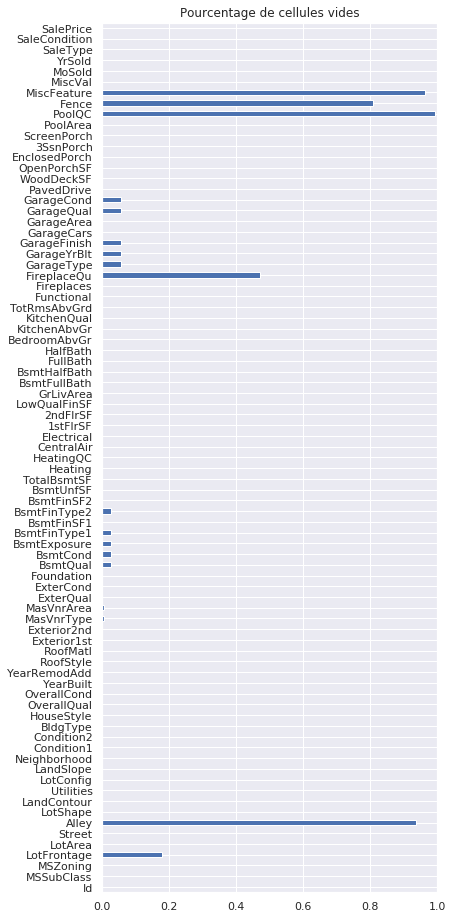

In [30]:
_, ax = plt.subplots(figsize=(6, 16))

df.isnull().mean().plot.barh(ax=ax)

ax.set(
    title="Pourcentage de cellules vides",
    xlim=(0, 1)
)

## 3.1. Valeurs vides

1. Plus de 20% de valeurs vides : on vire ces colonnes.
2. Garage et sous-sol (Bsmt) : on remplace les vides par NA.
3. LotFrontage : on remplace les celluls vides par 0.
4. MasVnrXXX : on vire les 8 lignes où c'est vide.

In [31]:
# 1a. Plus de 20% de valeurs vides : on vire ces colonnes.
for col in df.columns:
    if df[col].isnull().mean() > 0.2:
        df = df.drop(columns=[col])

In [32]:
# 1b. Plus de 20% de valeurs vides : on vire ces colonnes.
df = df.dropna(axis='columns', thresh=0.8 * len(df))

In [33]:
# 2. Garage et sous-sol (Bsmt) : on remplace les vides par NA.
cols = [
    col for col in df.columns
    if col.startswith('Bsmt') or col.startswith('Garage')
]

df.loc[:, cols] = df.loc[:, cols].fillna('NA')

In [34]:
# 3. LotFrontage : on remplace les cellules vides par 0.
df.loc[:, ['LotFrontage']] = df.loc[:, ['LotFrontage']].fillna(0.0)

In [35]:
# 4. MasVnrXXX : on vire les 8 lignes où c'est vide.
c = df['MasVnrArea'].notnull() & df['MasVnrType'].notnull()
df = df.loc[c]

In [36]:
# 5. On vire la ligne où Electrical est vide
c = df['Electrical'].notnull()
df = df.loc[c]

In [37]:
# On vérifie les cellules vides du tableau
df.isnull().any().any()

False

In [38]:
# On vérifie le nombre d'échantillons
len(df)

1451

## 3.2. Exploration visuelle

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


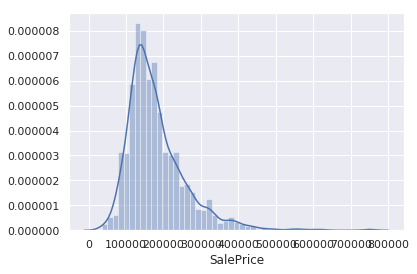

In [39]:
sns.distplot(df['SalePrice'])

In [40]:
df[['SalePrice']].describe()

,SalePrice
count,1451.000000
mean,180624.101999
std,79312.128273
min,34900.000000
25%,129900.000000
50%,162500.000000
75%,214000.000000
max,755000.000000


In [41]:
import matplotlib.pyplot as plt

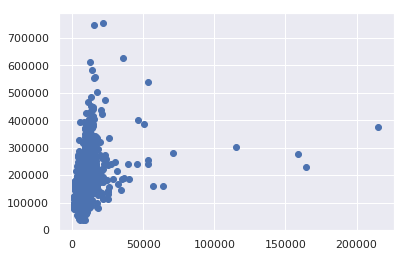

In [42]:
plt.scatter(df['LotArea'], df['SalePrice'])

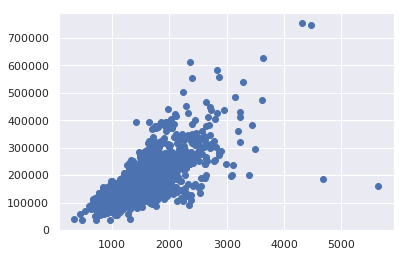

In [43]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

In [44]:
# On vire les points aberrants
c = (df['SalePrice'] < 200000) & (df['GrLivArea'] > 4000)

df = df.loc[~c]

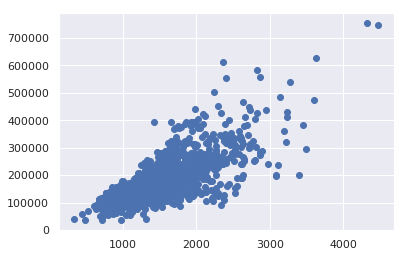

In [45]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

# 3.3. Régression simple

In [46]:
from sklearn.metrics import mean_squared_log_error

RMSLE-score : 0.29170907485597886


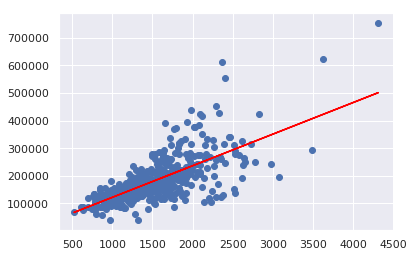

In [47]:
# Définir X et y
X = df[['GrLivArea']]
y = df['SalePrice']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# instanciation du régresseur
reg = LinearRegression()

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("RMSLE-score :", np.sqrt(mean_squared_log_error(y_test, y_pred)))

# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

In [48]:
def score_func(X, y, reg, nb_splits=10):
    """Rend la liste des scores du régresseur reg sur le problème X, y"""
    scores = []
    
    # boucle sur les splits possibles
    for i in range(nb_splits):
        # split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # apprentissage
        reg.fit(X_train, y_train)

        # prédiction
        y_pred = reg.predict(X_test)
        
        # correction
        y_pred = np.maximum(y_pred, 0)

        # calcul du score
        scores.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
        
    return scores

In [49]:
import time

def score_stats(X, y, reg, nb_splits=10):
    tt = time.time()
    scores = score_func(X, y, reg, nb_splits)
    
    duration = (time.time() - tt) / nb_splits
    
    print(
        f"{np.mean(scores):.2f} +/- {2 * np.std(scores):.2f}"
        f" (cpu_time: {duration:.3f} sec.)"
    )

score_stats(df[['GrLivArea']], y,LinearRegression() , nb_splits=10)

0.27 +/- 0.01 (cpu_time: 0.005 sec.)


In [50]:
X = df.select_dtypes(include=['int64', 'float64']) \
      .drop(columns=['SalePrice'])
y = df['SalePrice']

score_stats(X, y, LinearRegression(), nb_splits=10)

0.29 +/- 0.38 (cpu_time: 0.010 sec.)


In [51]:
from sklearn.svm import SVR

X = df.select_dtypes(include=['int64', 'float64']) \
      .drop(columns=['SalePrice'])
y = df['SalePrice']

score_stats(X, y, SVR(gamma='auto'), nb_splits=10)

0.40 +/- 0.03 (cpu_time: 0.125 sec.)


In [52]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

/home/girardea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [53]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma='auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100))
]:
    print(name)
    score_stats(X, y, reg, nb_splits=10)

linear
0.33 +/- 0.41 (cpu_time: 0.011 sec.)
svm
0.40 +/- 0.03 (cpu_time: 0.125 sec.)
KNN
0.24 +/- 0.02 (cpu_time: 0.015 sec.)
ada
0.20 +/- 0.03 (cpu_time: 0.187 sec.)
extra
0.14 +/- 0.02 (cpu_time: 0.626 sec.)
rf
0.15 +/- 0.01 (cpu_time: 1.030 sec.)


## 3.4. Pipelines

### 3.4.1. Mise à l'échelle (scaling)

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [56]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma='auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100))
]:
    print(name)
    
    pipe = Pipeline(steps=[
        ('scaler', QuantileTransformer()),
        ('reg', reg)
    ])
    score_stats(X, y, pipe, nb_splits=10)

linear
0.22 +/- 0.05 (cpu_time: 0.120 sec.)
svm
0.40 +/- 0.03 (cpu_time: 0.242 sec.)
KNN
0.18 +/- 0.01 (cpu_time: 0.128 sec.)
ada
0.19 +/- 0.02 (cpu_time: 0.321 sec.)
extra
0.14 +/- 0.02 (cpu_time: 0.765 sec.)
rf
0.14 +/- 0.02 (cpu_time: 1.118 sec.)


In [57]:
df.select_dtypes(exclude=['float64', 'int64']).sample(3).transpose()

,161,270,660
MSZoning,RL,FV,RL
Street,Pave,Pave,Pave
LotShape,IR1,Reg,Reg
LandContour,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub
LotConfig,Inside,Inside,CulDSac
LandSlope,Gtl,Gtl,Gtl
Neighborhood,NridgHt,Somerst,NWAmes
Condition1,Norm,Norm,Norm
Condition2,Norm,Norm,Norm


### 3.4.2. Encodage de catégories

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
# le "reshape" sert juste à transformer une colonne en tableau
categories = np.array(['H', 'F', 'H', 'E', 'H', 'E']).reshape(-1, 1)

pre = OneHotEncoder(sparse=False)

pre.fit_transform(categories)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

In [88]:
# Noms des colonnes qui contiennent des chaines de caractères (object)
str_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

# Forcer l'encodage en chaine de caractères
for col in str_cols:
    df[col] = df[col].astype(str)

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# 1ère brique : encodage des colonnes catégorielles
enc = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(
        categories=[X[col].unique() for col in str_cols]),
     str_cols)
    ],
    remainder="passthrough"
)

# Pipeline
pipe = Pipeline(steps=[
    ('encoding', enc),
    ('scaling', StandardScaler(with_mean=False)),
    ('reg', DecisionTreeRegressor())
])

score_stats(X, y, pipe)

0.21 +/- 0.02 (cpu_time: 0.145 sec.)


In [ ]:
def eval_columns(df, list_of_columns, reg=DecisionTreeRegressor()):
    """Evalue le score de chaque colonne dans la liste"""
    
    X = df.drop(columns=['SalePrice']).loc[:, list_of_columns]
    y = df['SalePrice']
    
    # Noms des colonnes qui contiennent des chaines de caractères (object)
    str_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

    # Forcer l'encodage en chaine de caractères
    for col in str_cols:
        X[col] = X[col].astype(str)

    # 1ère brique : encodage des colonnes catégorielles
    enc = ColumnTransformer(transformers=[
        ('enc', OneHotEncoder(
            categories=[X[col].unique() for col in str_cols]),
         str_cols)
        ],
        remainder="passthrough"
    )

    # Pipeline
    pipe = Pipeline(steps=[
        ('encoding', enc),
        ('scaling', StandardScaler(with_mean=False)),
        ('reg', reg)
    ])

    return score_func(X, y, pipe)

In [95]:
best_score = 1.0

for col in df.columns:
    if col == 'SalePrice':
        continue
    
    scores = eval_columns(df, [col])
    
    if np.mean(scores) < best_score:
        print(
            f"Best score yet: {np.mean(scores):.3f} "
            f"+/- {2*np.std(scores):.3f}"
            f" (column {col})")
        best_score = np.mean(scores)

Best score yet: 0.555 +/- 0.043 (column Id)
Best score yet: 0.336 +/- 0.016 (column MSSubClass)
Best score yet: 0.272 +/- 0.025 (column Neighborhood)
Best score yet: 0.233 +/- 0.016 (column OverallQual)


In [96]:
best_score = 1.0

for col in df.columns:
    if (col == 'SalePrice') or (col == 'OverallQual'):
        continue
    
    scores = eval_columns(df, ['OverallQual', col])
    
    if np.mean(scores) < best_score:
        print(
            f"Best score yet: {np.mean(scores):.3f} "
            f"+/- {2*np.std(scores):.3f}"
            f" (column {col})")
        best_score = np.mean(scores)

Best score yet: 0.320 +/- 0.016 (column Id)
Best score yet: 0.221 +/- 0.016 (column MSSubClass)
Best score yet: 0.217 +/- 0.013 (column MSZoning)
Best score yet: 0.208 +/- 0.024 (column Neighborhood)
Best score yet: 0.208 +/- 0.017 (column GarageCars)


In [102]:
nb_cols_max = 10
list_of_columns = []

for i in range(nb_cols_max):
    best_col = ""
    best_score = 1.0

    for col in df.columns:
        if (col == 'SalePrice') or (col in list_of_columns):
            continue

        scores = eval_columns(df, list_of_columns + [col], reg=RandomForestRegressor())

        if np.mean(scores) < best_score:
            best_col = col
            best_score = np.mean(scores)
    
    print(f"Adding column {best_col} (score: {best_score:.3f})")
    list_of_columns.append(best_col)

Adding column OverallQual (score: 0.234)
Adding column GarageCars (score: 0.205)
Adding column Neighborhood (score: 0.204)
Adding column PoolArea (score: 0.198)
Adding column KitchenAbvGr (score: 0.200)
Adding column FullBath (score: 0.197)
Adding column BldgType (score: 0.199)
Adding column Condition2 (score: 0.196)
Adding column LandSlope (score: 0.199)
Adding column 3SsnPorch (score: 0.200)
